# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 647


In [3]:
#seeing what a response looks like
url = f'https://api.openweathermap.org/data/2.5/weather?q=London&units=metric&appid={weather_api_key}'
response = requests.get(url).json()
response

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 721,
   'main': 'Haze',
   'description': 'haze',
   'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 5.41,
  'feels_like': 3.79,
  'temp_min': 3.68,
  'temp_max': 6.67,
  'pressure': 1027,
  'humidity': 94},
 'visibility': 4500,
 'wind': {'speed': 2.06, 'deg': 350},
 'clouds': {'all': 100},
 'dt': 1669924298,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1669880629,
  'sunset': 1669910132},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [1]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + f'q={city}&units=metric&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


NameError: name 'cities' is not defined

In [ ]:
type(city_data)

list

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

NameError: name 'city_data' is not defined

In [7]:
# Display sample data
city_data_df.head(20)

NameError: name 'city_data_df' is not defined

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(40)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,27.03,74,100,7.72,CK,1669254841
1,alegrete,-29.7831,-55.7919,16.45,54,0,2.90,BR,1669254842
2,atuona,-9.8000,-139.0333,25.45,77,12,6.20,PF,1669254702
3,fountain hills,33.6117,-111.7174,17.38,31,11,1.34,US,1669254843
4,busselton,-33.6500,115.3333,18.79,55,100,4.33,AU,1669254843
5,whitehorse,60.7161,-135.0538,-1.22,97,100,1.03,CA,1669254570
6,new norfolk,-42.7826,147.0587,17.18,57,100,2.24,AU,1669254844
7,rikitea,-23.1203,-134.9692,21.74,87,99,3.48,PF,1669254845
8,albany,42.6001,-73.9662,3.82,74,10,1.62,US,1669254796


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

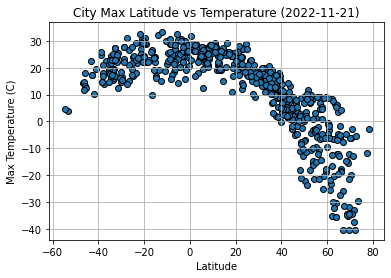

In [ ]:
# Build scatter plot for latitude vs. temperature
city_lat = city_data_df['Lat']
city_max_temp = city_data_df['Max Temp']
plt.scatter(city_lat, city_max_temp, edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Temperature (2022-11-21)')
plt.grid()

plt.savefig("output_data/Fig1.png")

#### Latitude Vs. Humidity

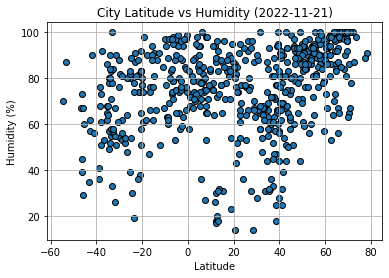

In [ ]:
# Build the scatter plots for latitude vs. humidity
city_humidity = city_data_df['Humidity']

plt.scatter(city_lat, city_humidity, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (2022-11-21)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

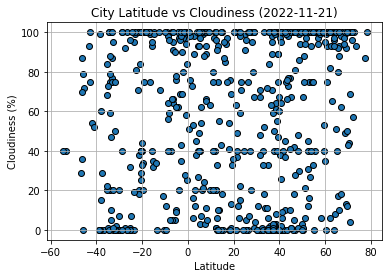

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
city_cloudiness = city_data_df['Cloudiness']
plt.scatter(city_lat,city_cloudiness, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (2022-11-21)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

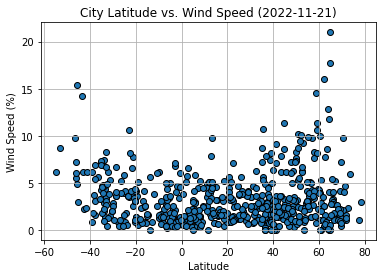

In [ ]:
# Build the scatter plots for latitude vs. wind speed
city_wind_speed = city_data_df['Wind Speed']
plt.scatter(city_lat, city_wind_speed, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.title('City Latitude vs. Wind Speed (2022-11-21)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def bestfit(x_axis,y_axis):
    slope, b, r, p, std = linregress(x_axis, y_axis)
    fit = slope * x_axis + b
    plt.plot(x_axis,fit,color = 'red')
    line_eq = f'y = {slope.round(2)}x + {b.round(2)}'
    print(f'The r value is: {r}.')

    #here i wanted to have my function to annotate the plots with the line equation, but I couldn't figure out how to get the best locations chosen automatically, any suggestions? 
    #plt.annotate(line_eq)
    print(line_eq) 


In [9]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_cities_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,fountain hills,33.6117,-111.7174,17.38,31,11,1.34,US,1669254843
5,whitehorse,60.7161,-135.0538,-1.22,97,100,1.03,CA,1669254570
8,albany,42.6001,-73.9662,3.82,74,10,1.62,US,1669254796
10,sept-iles,50.2001,-66.3821,-7.00,61,0,8.23,CA,1669254847
11,zhigansk,66.7697,123.3711,-40.30,100,62,1.06,RU,1669254847


In [10]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_cities_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,27.03,74,100,7.72,CK,1669254841
1,alegrete,-29.7831,-55.7919,16.45,54,0,2.90,BR,1669254842
2,atuona,-9.8000,-139.0333,25.45,77,12,6.20,PF,1669254702
4,busselton,-33.6500,115.3333,18.79,55,100,4.33,AU,1669254843
6,new norfolk,-42.7826,147.0587,17.18,57,100,2.24,AU,1669254844


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.857901702368073.
y = -0.7x + 34.07


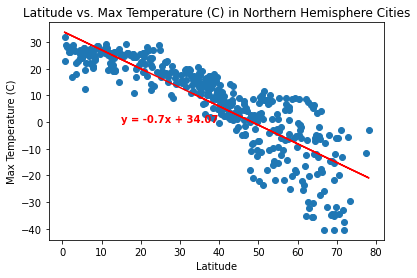

In [34]:
# Linear regression on Northern Hemisphere
north_hemi_lat = northern_hemi_cities_df['Lat']
north_hemi_max_temp = northern_hemi_cities_df['Max Temp']

plt.scatter(north_hemi_lat, north_hemi_max_temp,)
bestfit(north_hemi_lat, north_hemi_max_temp)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Latitude vs. Max Temperature (C) in Northern Hemisphere Cities')

#i had to run my function first to have it print the line equation, then manually annotated for each bc line_eq only exists in the function
plt.annotate('y = -0.7x + 34.07',(15,0), color = 'red', fontweight = 'bold')
plt.savefig("output_data/Fig5.png")


The r value is: 0.5332721123168945.
y = 0.22x + 27.01


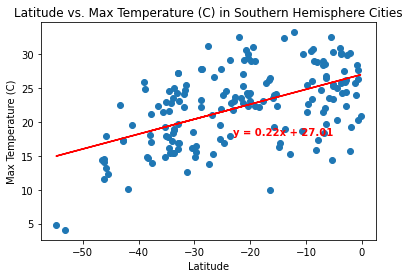

In [43]:
# Linear regression on Southern Hemisphere
south_hemi_lat = southern_hemi_cities_df['Lat']
south_hemi_max_temp = southern_hemi_cities_df['Max Temp']

plt.scatter(south_hemi_lat, south_hemi_max_temp)
bestfit(south_hemi_lat, south_hemi_max_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Latitude vs. Max Temperature (C) in Southern Hemisphere Cities')

plt.annotate('y = 0.22x + 27.01',(-23,18), color = 'red', fontweight = 'bold')
plt.savefig("output_data/Fig6.png")


**Discussion about the linear relationship:**


### Humidity vs. Latitude Linear Regression Plot

In the Northern Hemisphere, the max temperature decreases as the Latitude increases.
The correlation coefficient is r= -0.86, meaning there is a strong negative correlation.

In the Southern Hemisphere, the max temperature increases as the latitude increases.
The correlation coefficient is r = 0.53, meaning there is moderation positive correlation.

From looking at both of these graphs, we can see that temperatures begin to increase as latitude converges to 0 (lat=0 is the equator).

The r value is: 0.30858452025258865.
y = 0.3x + 64.65


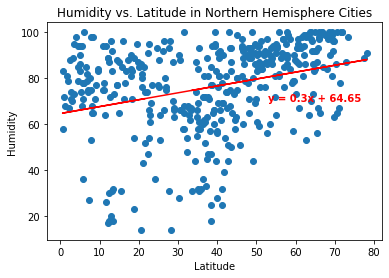

In [42]:
# Northern Hemisphere
north_hemi_humidity = northern_hemi_cities_df['Humidity']

plt.scatter(north_hemi_lat, north_hemi_humidity)
bestfit(north_hemi_lat, north_hemi_humidity)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude in Northern Hemisphere Cities')

plt.annotate('y = 0.3x + 64.65',(53,70), color = 'red', fontweight = 'bold')
plt.savefig("output_data/Fig7.png")

The r value is: 0.39241197715580556.
y = 0.5x + 82.43


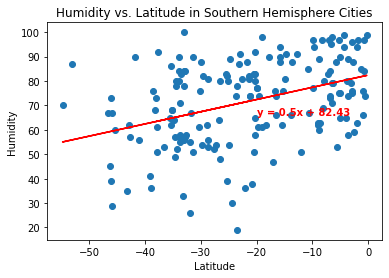

In [58]:
# Southern Hemisphere
south_hemi_humidity = southern_hemi_cities_df['Humidity']

plt.scatter(south_hemi_lat, south_hemi_humidity)
bestfit(south_hemi_lat, south_hemi_humidity)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude in Southern Hemisphere Cities')

plt.annotate('y = 0.5x + 82.43',(-20,66), color = 'red', fontweight = 'bold')
plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** 

In the Northern Hemisphere, we can see that humidity generally increases as the latitude increases.
In the Southern Hemisphere, we can see that humidity generally increases as latitude increases as well.
The correlation coefficient for these two variables in the North and South Hemispheres are 0.31 and 0.39, respectively, suggesting there is weak positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.2283116121267632.
y = 0.45x + 42.61


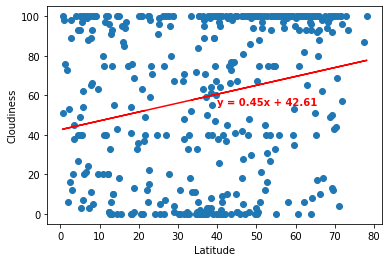

In [60]:
# Northern Hemisphere
north_hemi_cloudiness = northern_hemi_cities_df['Cloudiness']

plt.scatter(north_hemi_lat, north_hemi_cloudiness)
bestfit(north_hemi_lat, north_hemi_cloudiness)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.annotate('y = 0.45x + 42.61',(40,55), color = 'red', fontweight = 'bold')
plt.savefig("output_data/Fig9.png")

The r value is: 0.2389543904996647.
y = 0.67x + 69.13


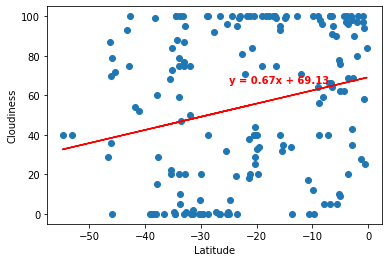

In [62]:
# Southern Hemisphere
south_hemi_cloudiness = southern_hemi_cities_df['Cloudiness']

plt.scatter(south_hemi_lat, south_hemi_cloudiness)
bestfit(south_hemi_lat, south_hemi_cloudiness)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.annotate('y = 0.67x + 69.13',(-25,66), color = 'red', fontweight = 'bold')
plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:** 

The data points for Cloudiness vs. Wind Speed in the North and South Hemispheres seem to be somewhat far apart. 
The correlation coefficients for the North and South Hemispheres are r = 0.23 and r = 0.24, respectively, meaning there is weak positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.18951131170309515.
y = 0.03x + 2.19


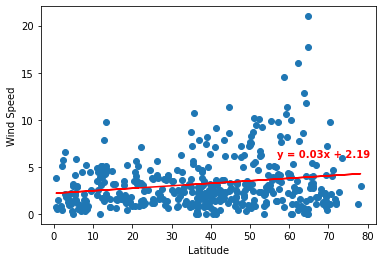

In [65]:
# Northern Hemisphere
north_hemi_wind_speed = northern_hemi_cities_df['Wind Speed']

plt.scatter(north_hemi_lat, north_hemi_wind_speed)
bestfit(north_hemi_lat, north_hemi_wind_speed)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.annotate('y = 0.03x + 2.19',(57,6), color = 'red', fontweight = 'bold')
plt.savefig("output_data/Fig11.png")

The r value is: -0.4353144911567547.
y = -0.08x + 1.63


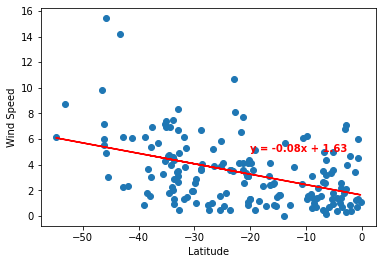

In [67]:
# Southern Hemisphere
south_hemi_wind_speed = southern_hemi_cities_df['Wind Speed']

plt.scatter(south_hemi_lat, south_hemi_wind_speed)
bestfit(south_hemi_lat, south_hemi_wind_speed)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.annotate('y = -0.08x + 1.63',(-20,5), color = 'red', fontweight = 'bold')
plt.savefig("output_data/Fig12.png")

**Discussion about the linear relationship:** 

In the Northern Hemisphere, Wind Speed increases as latitude increases, however r = 0.19, meaning there is very weak positive association between these two variables.
In the Southern Hemisphere, Wind Speed decreases as latitude increases and r = -0.43, meaning there is moderate negative association.
When comparing the two graphs, we can see that windspeeds tend to decreases as latitude converges to 0.